<a href="https://colab.research.google.com/github/BalkeesRekik/DS3001/blob/main/Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Observations: 976
Features: 11
         Make  Make_Year   Color  Body_Type  Mileage_Run No_of_Owners  \
0  Volkswagen       2017  silver      sedan        44611          1st   
1     Hyundai       2016     red  crossover        20305          1st   
2       Honda       2019   white        suv        29540          2nd   
3     Renault       2017  bronze  hatchback        35680          1st   
4     Hyundai       2017  orange  hatchback        25126          1st   

   Seating_Capacity Fuel_Type Transmission Transmission_Type   Price  
0                 5    diesel      7-Speed         Automatic  657000  
1                 5    petrol      5-Speed            Manual  682000  
2                 5    petrol      5-Speed            Manual  793000  
3                 5    petrol      5-Speed            Manual  414000  
4                 5    petrol      5-Speed            Manual  515000  
min_samples_leaf: 1, R2: 0.8211939168159187
min_samples_leaf: 2, R2: 0.7837380666553927
min_samples_leaf

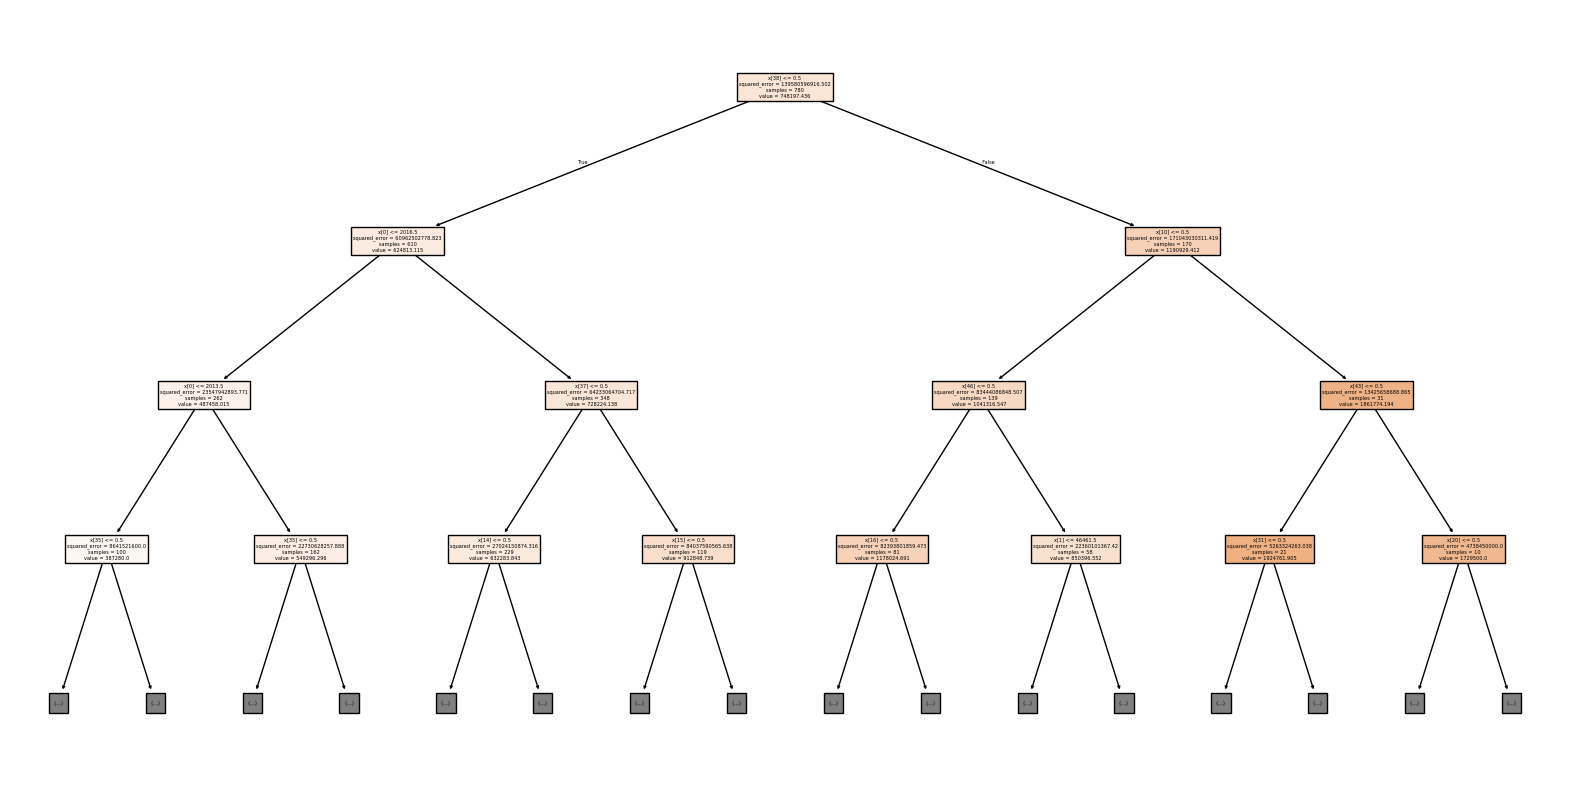

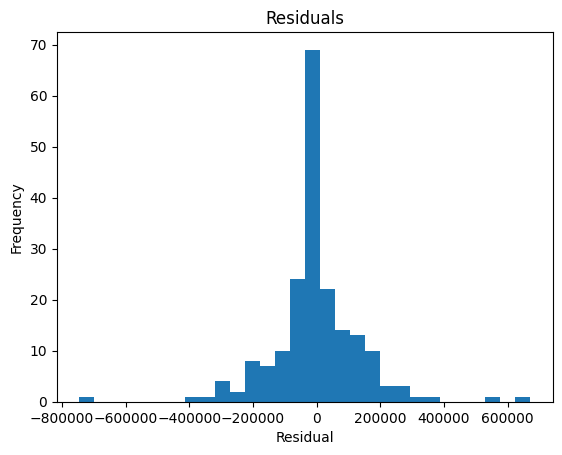


Linear Regression R2: 0.8202733305970975, RMSE: 143575.1966066185


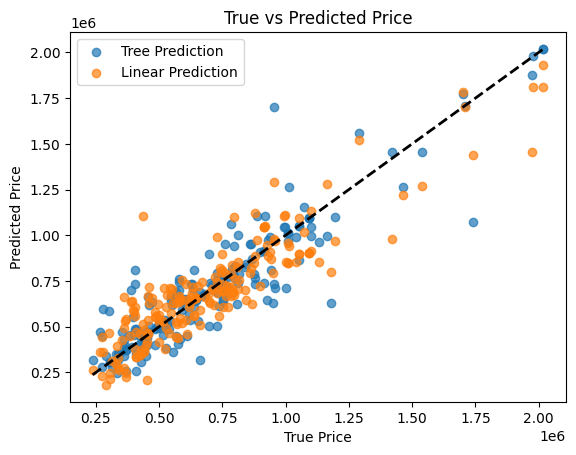

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load data
df = pd.read_csv('/content/cars_hw.csv')

# Drop irrelevant index column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Shape of the data
print(f"Observations: {df.shape[0]}")
print(f"Features: {df.shape[1]}")

# First few rows
print(df.head())

# One-hot encode categorical variables
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners',
                    'Fuel_Type', 'Transmission', 'Transmission_Type']

df_encoded = pd.get_dummies(df, columns=categorical_vars)

# Define target and features
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find best min_samples_leaf
best_r2 = -1
best_leaf = None

for leaf in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)

    print(f"min_samples_leaf: {leaf}, R2: {score}")

    if score > best_r2:
        best_r2 = score
        best_leaf = leaf

print(f"\nBest min_samples_leaf: {best_leaf} with R2: {best_r2}")

# Final model with optimal min_samples_leaf
final_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nDecision Tree R2: {r2}, RMSE: {rmse}")

# Plot tree (first few levels)
plt.figure(figsize=(20,10))
plot_tree(final_model, filled=True, max_depth=3)
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.title('Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Linear Regression for comparison
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print(f"\nLinear Regression R2: {lr_r2}, RMSE: {lr_rmse}")

# Scatter plot of predictions
plt.scatter(y_test, y_pred, label='Tree Prediction', alpha=0.7)
plt.scatter(y_test, lr_pred, label='Linear Prediction', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('True vs Predicted Price')
plt.show()


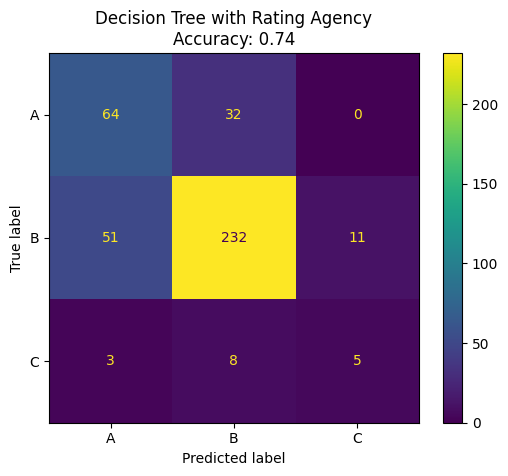

Accuracy: 0.7413793103448276


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv('/content/corporate_ratings.csv')

# Simplify Ratings into A, B, C groups
def simplify_rating(x):
    if x in ['AAA', 'AA', 'A']:
        return 'A'
    elif x in ['BBB', 'BB', 'B']:
        return 'B'
    else:
        return 'C'

df['Rating'] = df['Rating'].apply(simplify_rating)

# Drop irrelevant variables except 'Rating Agency Name'
drop_vars = ['Date', 'Name', 'Symbol']
X = df.drop(columns=drop_vars + ['Rating'])
y = df['Rating']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C'])
disp.plot()
plt.title(f'Decision Tree with Rating Agency\nAccuracy: {accuracy:.2f}')
plt.show()

print(f"Accuracy: {accuracy}")
